<a href="https://colab.research.google.com/github/samarth-mistry/arima-forcasting/blob/main/AH_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Authored by SAMARTH MISTRY on 01 July, '22**

---



# Test 1 [27 July '22]

Restaurant Revenue Prediction (https://www.kaggle.com/code/tarunsingh/restaurant-revenue-prediction/notebook) SVM

# Test 2 | model 2


https://www.kaggle.com/code/nmud19/restaurant-revenue-trial -- reference

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from sklearn import linear_model

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

In [ ]:
trainData = pd.read_csv('../input/train.csv.zip')
testData = pd.read_csv('../input/test.csv.zip')
trainData = trainData.drop('Id', axis=1)
testData = testData.drop('Id', axis=1)

In [ ]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format='%m/%d/%Y')

trainData['OpenDays']=""
testData['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']

trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)
testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)

trainData = trainData.drop('Open Date', axis=1)
testData = testData.drop('Open Date', axis=1)

In [ ]:
citygroupDummy = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummy)

citygroupDummyTest = pd.get_dummies(testData['City Group'])
testData = testData.join(citygroupDummyTest)

trainData = trainData.drop('City Group', axis=1)
testData = testData.drop('City Group', axis=1)

In [ ]:
trainData.head()

In [ ]:
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(numpy.log),
                      'Big Cities':trainData['Big Cities'], 'Other':trainData['Other'],
                      'P2':trainData['P2'], 'P8':trainData['P8'], 'P22':trainData['P22'],
                      'P24':trainData['P24'], 'P28':trainData['P28'], 'P26':trainData['P26']})
yTrain = trainData['revenue'].apply(numpy.log)
xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),
                      'Big Cities':testData['Big Cities'], 'Other':testData['Other'],
                     'P2':testData['P2'], 'P8':testData['P8'], 'P22':testData['P22'],
                      'P24':testData['P24'], 'P28':testData['P28'], 'P26':testData['P26']})

In [ ]:
#Regression on everything
cls = RandomForestRegressor(n_estimators=150)
cls.fit(xTrain, yTrain)
pred = cls.predict(xTest)
pred = numpy.exp(pred)
cls.score(xTrain, yTrain)

In [ ]:
pred = cls.predict(xTest)
pred = numpy.exp(pred)

In [ ]:
testData = pd.read_csv("../input/test.csv.zip")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple.csv',header=True, index=False)

In [ ]:
submission.head()

# Junk & Backup

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from sklearn import linear_model

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Fitting raw CSV

In [ ]:
# food-item -> id,catid,itemname,itemimage,itemdesc,price
import pandas as pd
foods = pd.read_csv("https://raw.githubusercontent.com/samarth-mistry/csv-data/main/ah/Food-Nutrition-Database.csv")

foods.info()

In [ ]:
# foods.iloc([])
# foods[['Short Description','Water In Grams']]
sel_foods=foods.loc[:,'Short Description':'Sugar Tot In Grams']
sel_foods.head()

In [ ]:
final_foods = sel_foods[['Short Description', 'Water In Grams','Protein In Grams','Energy In Kilogram Calorie']]
final_foods.columns = ['name', 'category_id', 'image_name', 'price']
final_foods['category_id'] = '1'
final_foods['image_name'] = 'cake.jpeg'
final_foods.insert(2,'hotel_id','1')
final_foods.insert(3,'description', "DESCRIPTION: " + final_foods['name'].str.capitalize())
final_foods['status'] = 'available'
final_foods.index.name ='id'
final_foods.index +=1
final_foods.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,name,category_id,hotel_id,description,image_name,price,status
id,,,,,,,
1,"BUTTER,WITH SALT",1,1,"DESCRIPTION: Butter,with salt",cake.jpeg,717,available
2,"BUTTER,WHIPPED,W/ SALT",1,1,"DESCRIPTION: Butter,whipped,w/ salt",cake.jpeg,718,available
3,"BUTTER OIL,ANHYDROUS",1,1,"DESCRIPTION: Butter oil,anhydrous",cake.jpeg,876,available
4,"CHEESE,BLUE",1,1,"DESCRIPTION: Cheese,blue",cake.jpeg,353,available
5,"CHEESE,BRICK",1,1,"DESCRIPTION: Cheese,brick",cake.jpeg,371,available


In [ ]:
from google.colab import files

final_foods.to_csv('ah_food_items.csv',index=False)
files.download('ah_food_items.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*For hotel table*

In [ ]:
# from google.colab import files

# uploaded = files.upload()
# h_t = pd.read_csv(io.BytesIO(uploaded['open-restaurant-applications-1.csv']))
from google.colab import auth
import pandas as pd
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
worksheet = gc.open('open-restaurant-applications-1').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)
# Convert to a DataFrame and render.

raw = pd.DataFrame.from_records(rows)

In [ ]:
r10=raw.iloc[1:50]
r15=raw.iloc[50:101]
r10[3] = 1
r15[3] = 2
r10[4] = r15[4] = 'available'

final = pd.DataFrame()
final[['id','table_name','description','hotel_id','status']] = pd.concat([r10[[0,1,10,3,4]],r15[[0,1,10,3,4]]])
final=final.set_index('id')
final.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,table_name,description,hotel_id,status
id,,,,
127,ff69a008-0905-40b2-8e9d-e2f197525021,"239 East 53rd Street, Manhattan, NY",2,available
128,d425d8ec-7fb3-4f5a-846b-a0dda07b8240,"158-22 Crossbay Blvd, Queens, NY",2,available
129,c04fea2f-df17-4873-8012-3910a01bada6,"609 vanderbilt ave, Brooklyn, NY",2,available
130,eaa3afb2-3538-43ad-83b0-604df65114e2,"10 10 downing street, Manhattan, NY",2,available
131,3ec0bca8-17b8-404c-88a3-ed238708f450,"69-46 myrtle ave, Queens, NY",2,available


In [ ]:
from google.colab import files

final.to_csv('ah_hotel_table.csv')
files.download('ah_hotel_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import auth
import pandas as pd
auth.authenticate_user()

import gspread
import uuid
import random
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
worksheet = gc.open('AH1-Dataset').sheet1

rows = worksheet.get_all_values()

In [ ]:
raw = pd.DataFrame.from_records(rows)
raw.head()

,0,1,2,3,4,5,6,7,8
0,item_id,h_table_id,hotel_id,quantity,status,rate,description,created_at,updated_at
1,9,2,5,2,served,454,"Gram flour, ghee, sugar",2022-06-04 8:09:01,2021-03-20 8:09:01
2,10,5,4,1,served,674,"Carrots, milk, sugar, ghee, cashews, raisins",2022-05-17 10:32:50,2021-01-28 10:32:50
3,10,3,2,7,served,359,"Flour, ghee, kewra, milk, clarified butter, su...",2022-04-04 6:11:34,2021-07-06 6:11:34
4,9,5,5,4,served,294,"Milk powder, plain flour, baking powder, ghee,...",2022-10-07 10:02:22,2022-06-11 10:02:22


In [ ]:
_choices = [1, 3, 5, 6]
list_ = []
cnt=0
num=4
val= 'order-'+str(uuid.uuid4())
for _ in range(len(raw.index)):
  if cnt == num:
    num = random.choice(_choices)
    val='order-'+str(uuid.uuid4())
    list_.append(val)
    cnt=0
  else:
    list_.append(val)

  cnt+=1

print(len(list_))
raw[9] = list_

251


In [ ]:
raw = raw.rename(columns={0:"item_id",1:"hotel_id",2:"category_id",3:"quantity",4:"status",5:"Amount",6:"description",7:"created_at",8:"updated_at",9:"number"})
raw = raw.drop(0)
orders = raw
orders.head()

,item_id,hotel_id,category_id,quantity,status,Amount,description,created_at,updated_at,number
1,9,2,5,2,served,454,"Gram flour, ghee, sugar",2022-06-04 8:09:01,2021-03-20 8:09:01,order-387bb1ab-05ac-48ba-8ddc-2b17fb7dbbd1
2,10,5,4,1,served,674,"Carrots, milk, sugar, ghee, cashews, raisins",2022-05-17 10:32:50,2021-01-28 10:32:50,order-387bb1ab-05ac-48ba-8ddc-2b17fb7dbbd1
3,10,3,2,7,served,359,"Flour, ghee, kewra, milk, clarified butter, su...",2022-04-04 6:11:34,2021-07-06 6:11:34,order-387bb1ab-05ac-48ba-8ddc-2b17fb7dbbd1
4,9,5,5,4,served,294,"Milk powder, plain flour, baking powder, ghee,...",2022-10-07 10:02:22,2022-06-11 10:02:22,order-2a7f7512-09bd-4366-be35-c65c6f78d9f3
5,7,5,3,1,served,420,"Sugar syrup, lentil flour",2022-12-25 1:19:33,2021-08-04 1:19:33,order-2a7f7512-09bd-4366-be35-c65c6f78d9f3


In [ ]:
from google.colab import files

raw.to_csv('ah_food_orders.csv')
files.download('ah_food_orders.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Visualization


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(6)

<Figure size 288x432 with 0 Axes>

[74, 85, 35, 66, 2, 225, 207, 119, 1, 210, 28, 203, 209, 81, 103, 115, 221, 94, 248, 242, 111, 187, 139, 131, 214, 17, 197, 135, 46, 240, 44, 246, 93, 21, 247]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


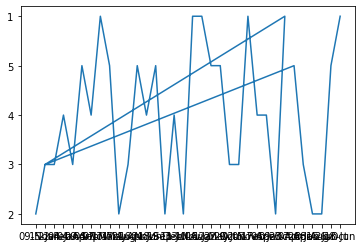

In [ ]:
vis = orders.loc[orders["item_id"]=="45"]
# vis[24]["quantity"] = 2
# print(vis.head())
# display(plt.plot(vis["created_at"], vis["quantity"]))

#sale on date 2022-06-04 8:09:01
# last week sale by qunatity | 5 may 8 aug
dt_range = pd.date_range(start='2022-05-03', end='2022-08-10')

vis = []
for in_range in dt_range:
  for order in orders.index:
    if str(in_range).split(" ")[0] == str(orders['created_at'][order]).split(" ")[0]:
      vis.append(order)


print(vis)
data = orders.iloc[vis]
data['created_at'] = pd.to_datetime(data['created_at']).dt.strftime("%d-%b")
plt.plot(data["created_at"], data["quantity"])

In [ ]:
#date range logic....
dt_range = pd.date_range(start='2022-06-10', end='2022-10-07')

vis = [in_range for in_range in dt_range if str(in_range).split(" ")[0] in [str(pp).split(" ")[0] for pp in orders["created_at"]]]
len(vis)

35

# Forcasting
---




## EDA - SM (7/8/22)

In [ ]:
# sales must be stationary for ARIMA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#warning contain million entries.... require high configuration
def load_data():
    return pd.read_csv('https://raw.githubusercontent.com/samarth-mistry/csv-data/main/ah/train.csv')

sales_data = load_data()
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
sales_data.head()
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.date = monthly_data.date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('date')['sales'].sum().reset_index()
    monthly_data.date = pd.to_datetime(monthly_data.date)
    return monthly_data

monthly_df = monthly_sales(sales_data)
print(len(monthly_df))  #60month - 5years
display(monthly_df.head())
display(monthly_df.tail())

60


,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


,date,sales
55,2017-08-01,1026403
56,2017-09-01,935263
57,2017-10-01,891160
58,2017-11-01,928837
59,2017-12-01,695170


In [ ]:
monthly_df_bkup = monthly_df.copy()

In [ ]:
monthly_df.info()     #from 01-2013 to 12-2017  | 5 years

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   sales   60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [ ]:
#exploratory data analysis
def sales_duration(data):
    data.date = pd.to_datetime(data.date)
    number_of_days = data.date.max() - data.date.min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'days')
    print(number_of_years, 'years')

sales_duration(sales_data)

1825 days
5.0 years


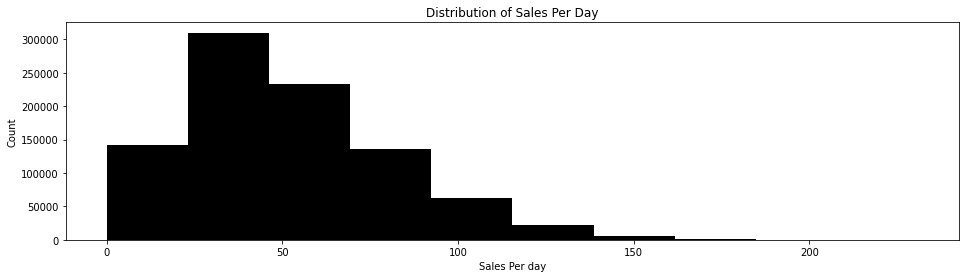

In [ ]:
def sales_per_day():
    fig, ax = plt.subplots(figsize=(16,4))
    plt.hist(sales_data.sales, color='black')

    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales Per Day")

sales_per_day()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


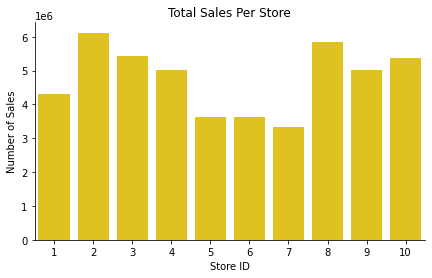

In [ ]:
def sales_per_store():
    by_store = sales_data.groupby('store')['sales'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(7,4))
    sns.barplot(by_store.store, by_store.sales, color='gold')

    ax.set(xlabel = "Store ID",
           ylabel = "Number of Sales",
           title = "Total Sales Per Store")

    sns.despine()

sales_per_store()

In [ ]:
!pip install flask-ngrok

from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home():
	return "GFG is great platform to learn"

app.run()


In [ ]:
# Average monthly sales
# Overall
avg_monthly_sales = monthly_df.sales.mean()
print(f"Overall average monthly sales: ${avg_monthly_sales}")

# Last 12 months (this will be the forecasted sales)
avg_monthly_sales_12month = monthly_df.sales[-12:].mean()       #last 12 entries only
print(f"Last 12 months average monthly sales: ${avg_monthly_sales_12month}")

Overall average monthly sales: $795075.2
Last 12 months average monthly sales: $894478.3333333334


In [ ]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')

    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    sns.lineplot((second.date + datetime.timedelta(6*365/12)), y_col, data=second, ax=ax, color='red', label='Mean Sales')

    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)

    sns.despine()

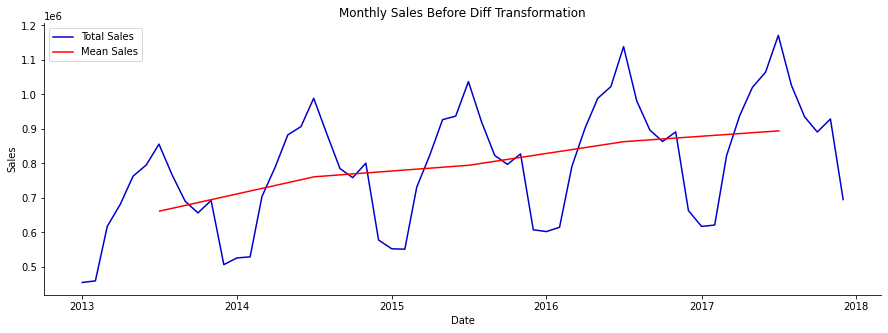

In [ ]:
time_plot(monthly_df, 'date', 'sales', 'Monthly Sales Before Diff Transformation')

In [ ]:
def get_diff(data):
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()

    data.to_csv('stationary_df.csv')
    return data

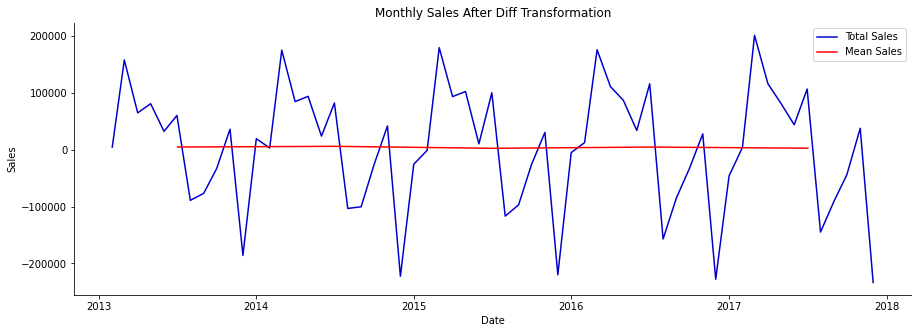

In [ ]:
stationary_df = get_diff(monthly_df)
time_plot(stationary_df, 'date', 'sales_diff', 'Monthly Sales After Diff Transformation')

In [ ]:
stationary_df.head()

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0


ValueError: ignored

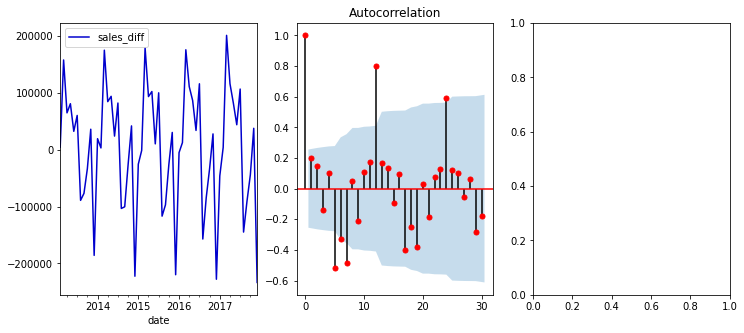

In [ ]:
def plots(data, lags=None):

    # Convert dataframe to datetime index
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)

    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))

    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='red')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='gold')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=30)

In [ ]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()

    #create column for each lag
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)

    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)

    supervised_df.to_csv('model_df.csv', index=False)

    return supervised_df

In [ ]:
model_df = generate_supervised(stationary_df)
model_df    #difference can be negative | count never be negative

In [ ]:
def generate_arima_data(data):
    dt_data = data.set_index('date').drop('sales', axis=1)
    dt_data.dropna(axis=0)

    dt_data.to_csv('arima_df.csv')

    return dt_data

In [ ]:
datetime_df = generate_arima_data(stationary_df)
print(len(datetime_df))

59


## Regression modelling

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import pickle

In [ ]:
model_df = pd.read_csv('model_df.csv')

#2017 seperation | | | |
def tts(data):
    data = data.drop(['sales','date'],axis=1)
    train, test = data[0:-12].values, data[-12:].values

    return train, test

train, test = tts(model_df)
display(train.shape)      #4years
display(test.shape)       #1year

(35, 13)

(12, 13)

In [ ]:
def scale_data(train_set, test_set):
    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)

    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)

    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)

    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()

    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(35, 12)

(12, 12)

(35,)

(12,)

*modelling function*

In [ ]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)  #reshape y_pred
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))

    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)

    return pred_test_set_inverted


In [ ]:
def load_original_df():
    #load in original dataframe without scaling applied
    original_df = pd.read_csv('https://raw.githubusercontent.com/samarth-mistry/csv-data/main/ah/train.csv')
    original_df.date = original_df.date.apply(lambda x: str(x)[:-3])
    original_df = original_df.groupby('date')['sales'].sum().reset_index()
    original_df.date = pd.to_datetime(original_df.date)
    return original_df

# load_original_df()

3652000
120


In [ ]:
def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted sales
    result_list = []
    sales_dates = list(original_df[-13:].date)
    act_sales = list(original_df[-13:].sales)

    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_sales[index])
        result_dict['date'] = sales_dates[index+1]
        result_list.append(result_dict)

    df_result = pd.DataFrame(result_list)

    return df_result

In [ ]:
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.sales[-12:], unscaled_df.pred_value[-12:]))
    mae = mean_absolute_error(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    r2 = r2_score(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [ ]:
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(original_df.date, original_df.sales, data=original_df, ax=ax,
                 label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax,
                 label='Predicted', color='Red')

    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = f"{model_name} Sales Forecasting Prediction")

    ax.legend()

    sns.despine()

    plt.savefig(f'{model_name}_forecast.png')

In [ ]:
def run_model(train_data, test_data, model, model_title):

    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)

    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)

    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)

    get_scores(unscaled_df, original_df, model_title)

    plot_results(unscaled_df, original_df, model_title)

*LINEAR REGRESSION*

RMSE: 16221.040790693221
MAE: 12433.0
R2 Score: 0.9907155879704752


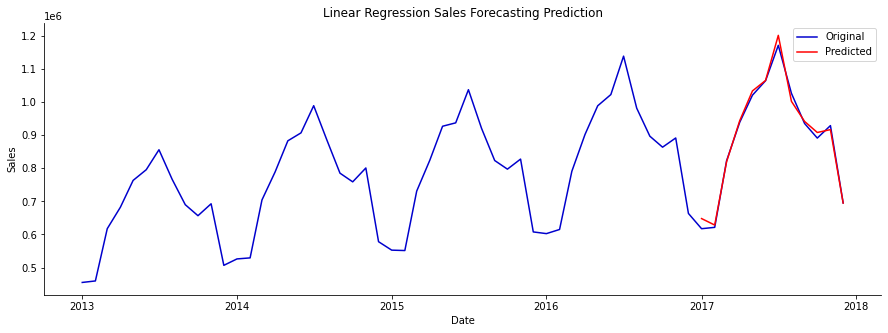

In [ ]:
run_model(train, test, LinearRegression(), 'Linear Regression')

# Generate data for Orders